# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [2]:
candidateno=230907 #this MUST be updated to your candidate number so that you get a unique data sample


In [651]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import NaiveBayesClassifier

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


ImportError: cannot import name 'NaiveBayesClassifier' from 'nltk.corpus' (C:\Users\Admin\anaconda3\lib\site-packages\nltk\corpus\__init__.py)

In [652]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [653]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])


The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['when', 'i', 'first', 'heard', 'that', 'kevin', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [654]:
pos_freq_words = [] #frequency of full training data
neg_freq_words = []

pos_word_list = [] #top 10 of the training data to be used in future
neg_word_list = []

common_terms = ['film', 'films', 'scene','scenes','director','see', 'people', 'one', 'like', 'film','movies', 'get', 'life', 
                'movie','really', 'never', 'little','man','know','plot','make','first','could', 'story', 'time', 'also', 'even',
                'well', 'would', 'much','character', 'characters', 'two', 'way']
#common terms that frequently appeared in top 10 for both lists that would appear to not reflect opinion
          
            
for a in range(len(training_data)):      #check within positive training data
    if training_data[a][1] == 'pos':
        for b in training_data[a][0]:
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    pos_freq_words.append(b.lower())   #built in normalisation
    else:
        for b in training_data[a][0]:         #check within negative training data
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    neg_freq_words.append(b.lower())

neg1 = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
pos1 = FreqDist(pos_freq_words)

for a in pos1.most_common(10): #obtain 10 most commonly occuring terms
    pos_word_list.append(a[0])
    
for a in neg1.most_common(10):
    neg_word_list.append(a[0])
    
print(pos_word_list)  
print(neg_word_list)

['good', 'best', 'great', 'many', 'new', 'love', 'world', 'us', 'still', 'makes']
['good', 'bad', 'action', 'big', 'another', 'made', 'something', 'new', 'go', 'work']


I have created two seperate lists called 'pos_word_list' and 'neg_word_list'. These lists will store the top 10 most frequently occuring words for both lists within the training data labelled as pos or neg. 

First of all, we iterate through the 'pos' labelled training data. Whilst iterating, we compare the word tokens to see if they are included in stop (stopwords) or whether they are an alpha character. We also compare against common_terms which I will explain in more detail in the paragraph below. Valid words will then be added to a list as a lower case string to complete the normalisation process. By normalising it makes the data more accurate, with no misrepresentations of the same word being seen as unique because of capitalisation or punctuation. This could have a detrimental impact on the freqDist data and cause innacurate results. We then complete the same process for the 'neg' training data. These loops also remove the label from the words in the training data before putting them in to the pos/neg_freq_words lists. This is done so that we can pass the words individually through the freqDist function.

We then use the freqDist NLTK function to determine the frequency of the words occuring. The freqDist has a method called most_common which I iterate through 10 times adding the 10 most frequently occuring terms to either the pos_word_list or the neg_word_list.

At this stage the two lists will contain words that will occur frequently in both sets of either positive or negative training data. The issue is that both these lists contain generic terms used to describe any movie regardless of the positive or negative label such as 'movie' or 'film'. One way of taking redundant generic terms from our list would be to only use unique values by comparing the lists and removing any terms that are not unqique. This however would remove duplicate values like 'good' in our data which are representative of the opinion of the reviewers and this will impact the accuracy of our world lists. Instead I manually printed the two lists and found duplicate values in the top 10 word lists which would not have been used to voice opinion. I felt this was important considering the word lists were relatively small in their size of 10. I then added these words to the common_terms, meaning they would not occur in the top 10 pos/neg_word_lists. 

Once these lists are complete they can then be used in the word classifers. 


2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [655]:
from nltk.classify.api import ClassifierI
import random

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, words): 
        score = 0
        
        # Assigns value to score dependant on occurrences of either negative or postive words 
        
        for word in words:
            if word in neg_word_list:
                score = score -1
            if word in pos_word_list:
                score = score + 1
        if score == 0:
            neutral_no = random.randint(0,1) #create random no for creating random result pos/neg if equal pos neg words
            result = "pos"
            if neutral_no == 1:
                result = "neg"
        if score < 0:
            result = "neg"
        if score > 0:
            result = "pos" 
                
        return result


    def labels(self): 
        return ("pos", "neg")


#classifier built for testing
classifier = SimpleClassifier(pos_word_list, neg_word_list)

#cases for testing:
#classifier.classify(FreqDist("This movie was bad,terrible and super awful. Who chose Owen Wilson to be Batman?".split()))
#classifier.classify(FreqDist("Love it! Nicholas Cage has inspired me to take up yoga".split()))
#classifier.classify(FreqDist("Neutral review of the Magical life of Keith".split()))

I have created a classifier class which contains a positive, negative label which is initiated through the constructor. This value can be returned through the 'labels' method. 

I have also created a classify method which takes a String argument called 'words'. This method will then iterate through individual Strings contained in the 'words' and determine whether these words are contained in either the negative_words list or the positive_words list. Dependant on which list the word may be contained in, the variable 'score' is either incremented or decremented. If the word is not contained in either list, the for loop will continue to iterate through words. At the end of the for loop, we check the value stored in the score variable to see whether it is positive, negative or equal to 0 in order to determine whether the String passed through the classifier is either negative or positive.


If an equal amount of words from words are contained in both the negative_words and positive_words lists (the score is equal to 0), then I use 'random' to randomly select either positive or negative. 

I used the construct similar to that of the simpleClassifier rather than the simpleClassifier_mf that featured in labs. This is because the mf classifier would create varying sized wordlists and we already havee a 10 word list from q1. 

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [656]:
pos_test_words = []
neg_test_words = []
                        
for a in range(len(testing_data)):     #positive testing data
    if testing_data[a][1] == 'pos':
        for b in testing_data[a][0]:
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    pos_test_words.append(b.lower())  #normalise

for a in range(len(testing_data)):      # negative testing data
    if testing_data[a][1] == 'neg':
        for b in testing_data[a][0]:
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    neg_test_words.append(b.lower()) 
 

test_with_label = []   #where we will store both pos and neg labels freqdists with label for classifier evaluate
label1 = "pos"
label2 = "neg"

pos2 = FreqDist(pos_test_words)     #combining freqdist items and their label into list of pairs
for i in pos2.items():
    test_with_label.append(((i),label1))
    
neg2 = FreqDist(neg_test_words)
for i in neg2.items():
    test_with_label.append(((i),label2))
    
test_with_label


[(('adapted', 5), 'pos'),
 (('comic', 69), 'pos'),
 (('books', 17), 'pos'),
 (('plenty', 10), 'pos'),
 (('success', 37), 'pos'),
 (('whether', 48), 'pos'),
 (('superheroes', 4), 'pos'),
 (('batman', 15), 'pos'),
 (('superman', 3), 'pos'),
 (('spawn', 5), 'pos'),
 (('geared', 1), 'pos'),
 (('toward', 21), 'pos'),
 (('kids', 52), 'pos'),
 (('casper', 1), 'pos'),
 (('arthouse', 1), 'pos'),
 (('crowd', 9), 'pos'),
 (('ghost', 12), 'pos'),
 (('world', 197), 'pos'),
 (('book', 73), 'pos'),
 (('hell', 34), 'pos'),
 (('starters', 2), 'pos'),
 (('created', 30), 'pos'),
 (('alan', 13), 'pos'),
 (('moore', 15), 'pos'),
 (('eddie', 12), 'pos'),
 (('campbell', 19), 'pos'),
 (('brought', 21), 'pos'),
 (('medium', 9), 'pos'),
 (('whole', 64), 'pos'),
 (('new', 202), 'pos'),
 (('level', 44), 'pos'),
 (('mid', 11), 'pos'),
 (('part', 96), 'pos'),
 (('series', 73), 'pos'),
 (('called', 48), 'pos'),
 (('watchmen', 1), 'pos'),
 (('say', 114), 'pos'),
 (('thoroughly', 10), 'pos'),
 (('researched', 1), 'pos

In [659]:


def classifier_evaluate(cls, test_data):
    '''
    cls: an instance of a classifier object which has a classify method which returns "pos" or "neg"
    test_data: a list of pairs where each pair is a FreqDist rep of a doc and its label
  
    returns: float point number which is the accuracy of the classifier on the test data provided 
    '''
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1
    return acc / (len(test_data)) #creates accuracy rating

classifier_evaluate(classifier, test_with_label) #use simple classifier and the list of pairs

0.4999848250326262

In [660]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self):
        p=0
        p = self.TP / (self.TP + self.FP)
    
        return p
  
    def recall(self):
        self.r=  self.TP / (self.TP + self.FN)
        return self.r
    
        return r
  
    def f1(self):
        f1=0
        p=self.precision()
        r=self.recall()
        self.f1=0
        f1= 2* ((p*r) / (p+r))
        return f1 

In [661]:
#docs will contain the documents to classify, labels contains the corresponding gold standard labels
docs,labels=zip(*testing_data)
senti_cm=ConfusionMatrix(classifier.classify_many(docs),labels)


#For Testing:

print(senti_cm.TP)
print(senti_cm.FP)
print(senti_cm.TN)#print(senti_cm.FN)
print(senti_cm.FN)

f1_og = senti_cm.f1()
recall_og = senti_cm.recall()
precision_og = senti_cm.precision()  #stored in variables for later use in comparison

183
112
188
117



3b) It would not be reasonable to evaluate this classifier in terms of it's accuracy. By utilising the accuracy rating we do not discriminate between True positives, False positives, True Negatives and false positives. Instead, we give each rating an equal priority in terms of rating. The Simple Classifier that has been produced has an accuracy rating of approximately 50%. We could improve these score however we would not know where we could make improvements going by the accuracy score alone. For instance, if we used Precision, we could examine whether we have too many false positives. By doing so we alter our word list accordingly or adjust our classifier. 

This is also dependant on the use of the classifier and whether the user is more concerned over negative reviews? When looking at movie reviews we may want to prioritise negative reviews over positive. For instance, a producer wants to know whether a negative rating has increased when producing a sequel to a new film. Or in a completely different scenario, an airplane manufacturer may be more concerned regarding faulty parts rather than the parts that are working. In which case a better evaluation may be Recall in order to see if any of the actual positives were predicted as negative. 


4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [662]:
import math
class NBClassifier(ClassifierI):
    
    def __init__(self):
        
        pass
    
    def _set_known_vocabulary(self,training_data):
        #add your code here
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def _set_priors(self,training_data):
        #add your code here 
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def _set_cond_probs(self,training_data):       
        #add your code here
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)
    
    def classify(self,doc):
        #add your code here
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)
    

In [663]:
pos_freq_words_test = [] #frequency of full testing data
neg_freq_words_test = []
          
            
for a in range(len(testing_data)):      #check within positive training data
    if testing_data[a][1] == 'pos':
        for b in testing_data[a][0]:
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    pos_freq_words_test.append(b.lower())   #built in normalisation
    else:
        for b in testing_data[a][0]:         #check within negative training data
            if b not in stop and b.isalpha():
                if b not in common_terms:
                    neg_freq_words_test.append(b.lower())

In [821]:


pos_data_train=[(FreqDist(sent.split()),"pos") for sent in pos_freq_words]
neg_data_train=[(FreqDist(sent.split()),"neg") for sent in neg_freq_words]
full_data_train = neg_data_train + pos_data_train


pos_data_test = [(FreqDist(sent.split()), "pos") for sent in pos_freq_words_test] 
neg_data_test = [(FreqDist(sent.split()), "neg") for sent in neg_freq_words_test]
test_data_test = neg_data_test + pos_data_test

myclassifier=NBClassifier()
myclassifier.train(full_data_train)
myclassifier.classify_many(doc for (doc,label) in test_data_test)




['neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',


In [822]:
#docs will contain the documents to classify, labels contains the corresponding gold standard labels
docs,labels=zip(*test_data_test)
senti_cm2=ConfusionMatrix(myclassifier.classify_many(docs),labels)


#For Testing:

#print(senti_cm2.TP)
#print(senti_cm2.FP)
#print(senti_cm2.TN)#print(senti_cm.FN)#print(senti_cm2.FN)
#print(senti_cm2.FN)

a = senti_cm2.recall()
b = senti_cm2.precision()
c = senti_cm2.f1()

accuracy_nb = classifier_evaluate(myclassifier, test_data_test)
accuracy_og = classifier_evaluate(classifier, test_with_label)

print("The Naive Bayes classifier has a recall score of " + str(a) + " in comparison to the std classifier of " + str(recall_og))
print("The Naive Bayes classifier has a precision score of " + str(b) + " in comparison to the std classifier of " + str(precis_og))
print("The Naive Bayes classifier has a f1 score of " + str(c) + " in comparison to the std classifier of " + str(f1_og))
print("The Naive Bayes classifier has a accuracy score of " + str(accuracy_nb) + " in comparison to the std classifier of " + str(accuracy_og))

The Naive Bayes classifier has a recall score of 0.7230292902471781 in comparison to the std classifier of 0.6166666666666667
The Naive Bayes classifier has a precision score of 0.5590079343061644 in comparison to the std classifier of 0.622895622895623
The Naive Bayes classifier has a f1 score of 0.63052632520049 in comparison to the std classifier of 0.6218487394957983
The Naive Bayes classifier has a accuracy score of 0.556809102754527 in comparison to the std classifier of 0.4983459285562536


4b)The Naive Bayes classifier has a accuracy score of 0.556809102754527 in comparison to the std classifier of 0.4999848250326262. The Naive Bayes classifier has a better accuracy score. The accuracy determines the ratio of predicted TP TN results to the TP FP FN TN total results. The total for FP is over twice the amount of FN however making the accuracy score a less relevant method for determining performance of the two classifiers.

The Naive Bayes classifier has a recall score of 0.7230292902471781 in comparison to the std classifier of 0.6166666666666667.
Both classifiers performed well with high recall scores. The Naive Bayes classifier had an overall greater recall score. Recall is ideal when the user of the classifier wants to avoid TP being classified as FN. So, if it were imperative that negative movie reviews were not labelled as positive, the recall score would be the most important metric.

The Naive Bayes classifier has a precision score of 0.5590079343061644 in comparison to the std classifier of 0.622895622895623. The standard classifier has outperformed the Naive Bayes classifier in terms of precision. The precision score tests out of how many that we predicted positive, how many were true positives. This means that the std classifier has performed better in classifying positive predictions.

The Naive Bayes classifier has a f1 score of 0.63052632520049 in comparison to the std classifier of 0.6218487394957983. The two classifiers have almost identical f1 scores. The f1 score is generally seen as a more accurate metric than the accuracy rating as it will take both recall and precision into account. The difference between the two is almost negligible however the Naive Bayes slightly out performs the word classifier..

Overall, the two classifiers have performed similarly. Going by both f1 and accuracy score the Naive Bayes classifier slightly outperformed the word list classifier however the word list classifier had a higher score in precision. As the f1 score is slightly higher on the Naive Bayes and the f1 is great metric for determining performance considering both recall and precision, I believe the Naive Bayes is the better performing classifier.


5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


First of all, I am creating different length word lists to pass through the word list classifier. The same method has been used as the method used for creating a 10 word length word list. I perform the FreqDist and then choose the 50 most common words. I then add these to two lists dependant on neg or pos labels. These come from the variable pos_freq_words and neg_freq_words that we used earlier. I then create classifier objects for each of the variations of length of word list. I chose to start with smaller intervals and then progress into intervals of 100. Overall 6 different sized word lists were used which gave me enough data to see if a pattern was forming.

In [834]:
#SAMPLE OF 50


pos_word_list_extd = []
neg_word_list_extd = []

neg5 = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
pos5 = FreqDist(pos_freq_words)

for a in pos5.most_common(50): #obtain 10 most commonly occuring terms
    pos_word_list_extd.append(a[0])
    
for a in neg5.most_common(50):
    neg_word_list_extd.append(a[0])
    

classifierFifty = SimpleClassifier(pos_word_list_extd, neg_word_list_extd)



#SAMPLE OF 100


pos_word_list_cent = []
neg_word_list_cent = []

neg100 = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
pos100 = FreqDist(pos_freq_words)

for a in pos100.most_common(100): #obtain 10 most commonly occuring terms
    pos_word_list_cent.append(a[0])
    
for a in neg100.most_common(100):
    neg_word_list_cent.append(a[0])
    

classifierCent = SimpleClassifier(pos_word_list_cent, neg_word_list_cent)


#SAMPLE OF 200


pos_word_list_cent50 = []
neg_word_list_cent50 = []

neg150 = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
pos150 = FreqDist(pos_freq_words)

for a in pos150.most_common(200): #obtain 10 most commonly occuring terms
    pos_word_list_cent50.append(a[0])
    
for a in neg150.most_common(200):
    neg_word_list_cent50.append(a[0])

classifierCent50 = SimpleClassifier(neg_word_list_cent50, pos_word_list_cent50)


#SAMPLE OF 300


pos_word_list_thou = []
neg_word_list_thou = []

negThou = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
posThou = FreqDist(pos_freq_words)

for a in posThou.most_common(300): #obtain 10 most commonly occuring terms
    pos_word_list_thou.append(a[0])
    
for a in negThou.most_common(300):
    neg_word_list_thou.append(a[0])
    
 
classifierThou = SimpleClassifier(neg_word_list_thou, pos_word_list_thou)


#SAMPLE OF 400


pos_word_list_400 = []
neg_word_list_400 = []

neg400 = FreqDist(neg_freq_words) #store tuple of frequency data of each word occuring
pos400 = FreqDist(pos_freq_words)

for a in pos400.most_common(400): #obtain 10 most commonly occuring terms
    pos_word_list_400.append(a[0])
    
for a in neg400.most_common(400):
    neg_word_list_400.append(a[0])
    

classifier400 = SimpleClassifier(neg_word_list_400, pos_word_list_400)
    
    


The different sized word lists have been passed through the classifiers and stored in classifier objects. I then pass these classify objects through the confusion matrix whilst calling the classifiers classify_many method. This allows us to classify multiple documents rather than each document singularly. The result is stored in a variable with a name beginning with senti_cm. We can call the ConfusionMatrix's methods of recall,f1 and precision which we can use for comparison. These values are then stored in a Dataframe which allows us to both see the values clearly in a table and also utilise these values in a graph. 

In [835]:
docs,labels=zip(*testing_data)
senti_cm4=ConfusionMatrix(classifierFifty.classify_many(docs),labels)


#SAMPLE OF 50

f1_og4 = senti_cm4.f1()
recall_og4 = senti_cm4.recall()
precision_og4 = senti_cm4.precision()  
accuracy_4 = classifier_evaluate(classifierFifty, test_data_test)


#SAMPLE OF 100

docs,labels=zip(*testing_data)
senti_cm100=ConfusionMatrix(classifierCent.classify_many(docs),labels)

f1_og100 = senti_cm100.f1()
recall_og100 = senti_cm100.recall()
precision_og100 = senti_cm100.precision() 
accuracy_100 = classifier_evaluate(classifierCent, test_data_test)

#SAMPLE OF 200

docs,labels=zip(*testing_data)
senti_cm200=ConfusionMatrix(classifierCent50.classify_many(docs),labels)

f1_og200 = senti_cm200.f1()
recall_og200 = senti_cm200.recall()
precision_og200 = senti_cm200.precision()  
accuracy_200 = classifier_evaluate(classifierThou, test_data_test)

#SAMPLE OF 300

docs,labels=zip(*testing_data)
senti_cm1000=ConfusionMatrix(classifierThou.classify_many(docs),labels)

f1_og1000 = senti_cm1000.f1()
recall_og1000 = senti_cm1000.recall()
precision_og1000 = senti_cm1000.precision()  
accuracy_1000 = classifier_evaluate(classifierThou, test_data_test)

#SAMPLE OF 400

docs,labels=zip(*testing_data)
senti_cm400=ConfusionMatrix(classifierThou.classify_many(docs),labels)

f1_og400 = senti_cm400.f1()
recall_og400 = senti_cm400.recall()
precision_og400 = senti_cm400.precision()  
accuracy_400 = classifier_evaluate(classifier400, test_data_test)

#string printout for comparison

print(" f1- 10: " + str(f1_og) + " 50: " + str(f1_og4) + " 100: " + str(f1_og100) + " 200: " + str(f1_og200) + " 300: " + str(f1_og1000)+ " 400: " + str(f1_og400))
print(" recall- 10: " + str(recall_og) + " 50: " + str(recall_og4) + " 100: " + str(recall_og100) + " 200: " + str(recall_og200) + " 300: " + str(recall_og1000)+ " 400: " + str(recall_og400))
print(" precision- 10: " + str(precision_og) + " 50: " + str(precision_og4) + " 100: " + str(precision_og100)+ " 200: " + str(precision_og200) + " 300: " + str(precision_og1000)+ " 400: " + str(precision_og400))
print(" Accuracy- 10: " + str(accuracy_og) + " 50: " + str(accuracy_4) + " 100: " + str(accuracy_100) + " 200: " + str(accuracy_200)+ " 300: " + str(accuracy_1000)+ " 400: " + str(accuracy_400))

 f1- 10: 0.6218487394957983 50: 0.6225165562913908 100: 0.6220735785953178 200: 0.6340640809443508 300: 0.6182432432432432 400: 0.632279534109817
 recall- 10: 0.6166666666666667 50: 0.6266666666666667 100: 0.62 200: 0.6266666666666667 300: 0.61 400: 0.6333333333333333
 precision- 10: 0.6271186440677966 50: 0.618421052631579 100: 0.6241610738255033 200: 0.6416382252559727 300: 0.6267123287671232 400: 0.6312292358803987
 Accuracy- 10: 0.4983459285562536 50: 0.5014182837961747 100: 0.5017400116894468 200: 0.5037990702063885 300: 0.5025121586332999 400: 0.5031770629460623


In [831]:
graph_word_list = pd.DataFrame ({ "WordListSize": [ 10, 50, 100, 200, 300, 400], "F1": [f1_og, f1_og4, f1_og100, f1_og200, f1_og1000,f1_og400],"recall": [recall_og, recall_og4, recall_og100, recall_og200, recall_og1000,recall_og400], "Precision": [precision_og, precision_og4, precision_og100, precision_og200, precision_og1000,precision_og400],"Accuracy": [accuracy_og, accuracy_4, accuracy_100, accuracy_200, accuracy_1000, accuracy_400],"F1-Bayes": [c,c,c,c,c,c],"Accuracy-Bayes": [accuracy_nb,accuracy_nb,accuracy_nb,accuracy_nb,accuracy_nb,accuracy_nb],})

graph_word_list


,WordListSize,F1,recall,Precision,Accuracy,F1-Bayes,Accuracy-Bayes
0,10,0.621849,0.616667,0.627119,0.498346,0.630526,0.556809
1,50,0.613333,0.613333,0.613333,0.503204,0.630526,0.556809
2,100,0.630691,0.623333,0.638225,0.502855,0.630526,0.556809
3,200,0.615905,0.606667,0.625430,0.502920,0.630526,0.556809
4,300,0.634868,0.643333,0.626623,0.502737,0.630526,0.556809
5,400,0.631052,0.630000,0.632107,0.504711,0.630526,0.556809


We can then plot the figures in a graph which will allow us to see trends. I decided to put accuracy on to a seperate graph which makes the graphs easier to view. 

<AxesSubplot:xlabel='WordListSize'>

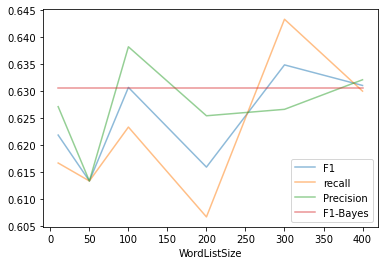

In [830]:

graph_word_list.plot(x="WordListSize", y=["F1", "recall", "Precision", "F1-Bayes"], alpha=0.5)


<AxesSubplot:xlabel='WordListSize'>

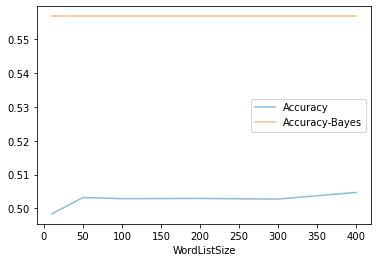

In [832]:
graph_word_list.plot(x="WordListSize", y=["Accuracy", "Accuracy-Bayes"], alpha=0.5)

The data from the graphs shows that growth of the word list causes sporadic results. Recall has a smaller rating than precision for 200 however it is the inverse for 300. The F1 score for the word list is also sporadic increasing and decreasing without any apparent pattern. One reason for this may be that, as the word lists increase, the words that are used become less frequent and may also be less relevant to positive/negative reviews. Another reason for the results not showing a pattern could be because of an error in creating the classifier. Accuracy does however consistently increase by a negligible amount providing evidence that larger word lists do impact the classifiers performance.

Overall, the results are inconclusive as to whether larger word lists produce better results. Because of this, if using a word list, I would recommend shorter word lists. This will not only choose the most relevant (common) words however it will also save time and memory space. 

However, from the evidence from the graph I would recommend using the Naive Bayes classifier. Naive Bayes is more predictable and performs faster than a moderate sized word list classifier. In terms of performance, Naive Bayes produces a much better accuracy rating and on average a better f1 score. This is probably caused by the Naive Bayes independent probabilities being more reliable in this instance than the word list classifiers.

In [833]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="NLassignment2021.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 259


The code above was not calculating my word count correctly however copying all markdown cells in to word, the word count comes to 1628